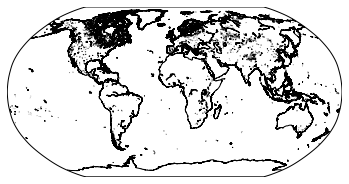

In [5]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import numpy as np
import os

def save_coastal_data(path,resolution='f'):

    m = Basemap(projection='robin',lon_0=0,resolution=resolution)

    coast = m.drawcoastlines()

    coordinates = np.vstack(coast.get_segments())
    lons,lats = m(coordinates[:,0],coordinates[:,1],inverse=True)

    D = {'lons':lons,'lats':lats}
    
    if not os.path.exists(os.path.dirname(path)):
        try:
            os.makedirs(os.path.dirname(path))
        except OSError as exc: # Guard against race condition
            if exc.errno != errno.EEXIST:
                raise

    np.save(os.path.join(path,'coastal_basemap_data.npy'),D)


#Define path
path = '../data/coastline/'
#Run just one time to save the data. Will cost less time
save_coastal_data(path,resolution='h')  

In [36]:
D = np.load(os.path.join(path,'coastal_basemap_data.npy'), allow_pickle=True).tolist()
lons,lats = D['lons'],D['lats']

def distance_from_coast(lons, lats, lon,lat,fpath):

    dists = np.sqrt((lons-lon)**2+(lats-lat)**2)

    return np.min(dists)

In [42]:
distance_from_coast(lons,lats, -117.2547,32.8049,
os.path.join(path,'coastal_basemap_data.npy'))

0.006323561984074937
